# Pymaceuticals Inc.

### Analysis

- The heavier the mouse the less effective the drug is (refer scatter plot). 
- The effectiveness of Capomulin Drug is higer than the Infubinol and Ceftamine but comparable to Ramicane (refer to the box plot)
- The results of the study are very consistent thus reliable, as there is only 1 outlier in the data set for the Infuinol drug and none for Capomulin (refer box plot)
- In this study the number of male mice is higher than female mice (refer pie chart)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mouse_count = mouse_data_complete["Mouse ID"].unique()
mouse_count = pd.Series(mouse_count).count()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mouse_count_timepoint= mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_count_timepoint

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.set_option("display.max_rows", 13)
duplicate_mouse_count= mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_count

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# extra work to veryfy - Count of each mouse id to check the duplicate

mouse_data_complete["Mouse ID"].value_counts()


Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Count of each mouse id to check the duplicate for mouse id = 'g989'
indexed_mouse_data= mouse_data_complete.set_index("Mouse ID")
indexed_mouse_data.loc['g989']




,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data =mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] != 'g989'), :]
clean_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
#clean data mouse count 
clean_data_index = clean_data
clean_data_index['Mouse ID'].value_counts()


Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse =  clean_data_index["Mouse ID"].unique()
clean_mouse_count = pd.DataFrame(clean_mouse)
clean_mouse_count.count()



0    248
dtype: int64

## Summary Statistics

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

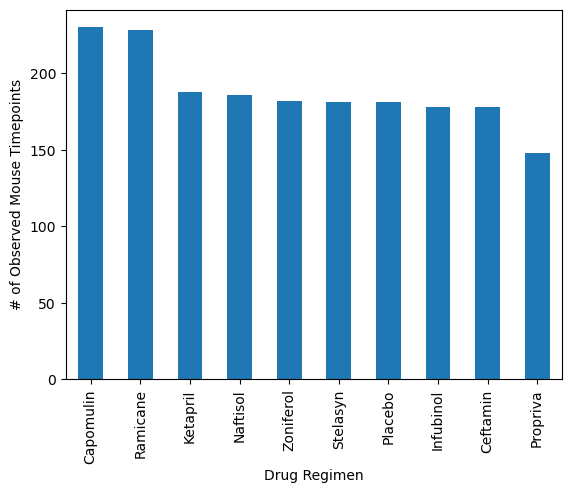

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Data_plot =clean_data["Drug Regimen"].value_counts()
Data_plot
Data_plot.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



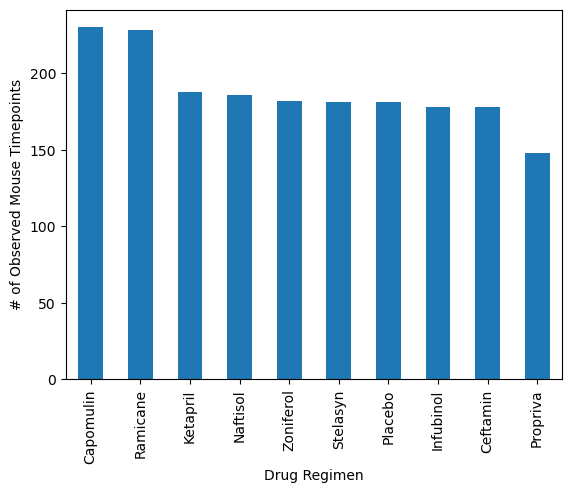

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a list indicating where to write x labels and set figure size to adjust for space
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_ratio = clean_data["Sex"].value_counts()
sex_count = clean_data["Sex"].count()
ratio = (sex_ratio/sex_count)*100
ratio



Sex
Male      50.957447
Female    49.042553
Name: count, dtype: float64

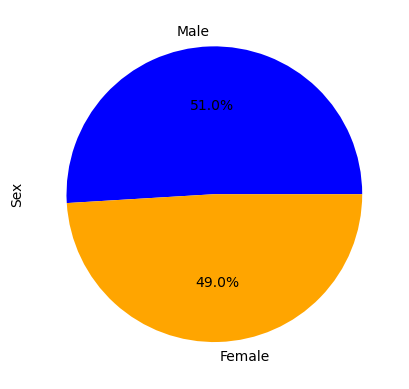

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors =["blue","orange"]
labels ="Sex"
pie_plot = ratio.plot(kind="pie",colors=colors,autopct="%1.1f%%", startangle=360)
plt.ylabel("Sex")
plt.show()

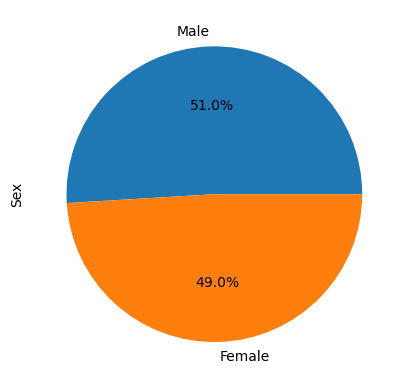

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels ="Male","Female"
sizes = ratio
plt.ylabel("Sex")
pie_chart = plt.pie(sizes,labels=labels,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(clean_data.groupby(["Mouse ID"])["Timepoint"].max())
greatest_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_timepoint.merge(clean_data,how="left",on=["Mouse ID","Timepoint"])
merge_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for Drugs in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_for_mice = merge_df.loc[merge_df["Drug Regimen"]==Drugs,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(drug_for_mice)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_for_mice.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_occupancy = drug_for_mice.loc[(drug_for_mice< lower_bound) | (drug_for_mice > upper_bound)]
   
    print(f"{Drugs}'s  Potential Outlier: { outlier_occupancy}")

Capomulin's  Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's  Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's  Potential Outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's  Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


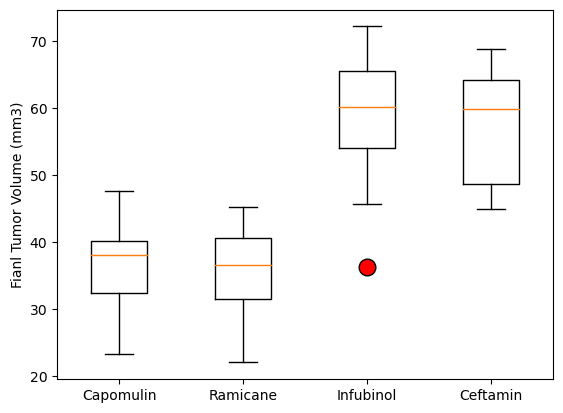

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Fianl Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data,labels=treatment,flierprops={"markerfacecolor": "red","markersize":"12"})
plt.show()


## Line and Scatter Plots

In [19]:
#pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 10)
clean_data["Mouse ID"].value_counts()

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

Text(0, 0.5, 'Tumor Volume (mm3) ')

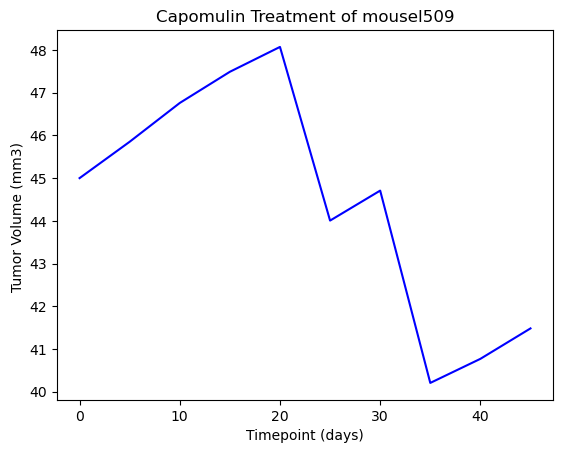

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#clean_data =mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] != 'g989'), :]

timept= clean_data.loc[(clean_data["Mouse ID"]=="l509")]
timept =timept.set_index("Timepoint")
plt.plot(timept.index,timept["Tumor Volume (mm3)"],color ='blue')
plt.title("Capomulin Treatment of mouse" +"l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3) ")




Text(0, 0.5, 'Average Tumor Volume (mm3)')

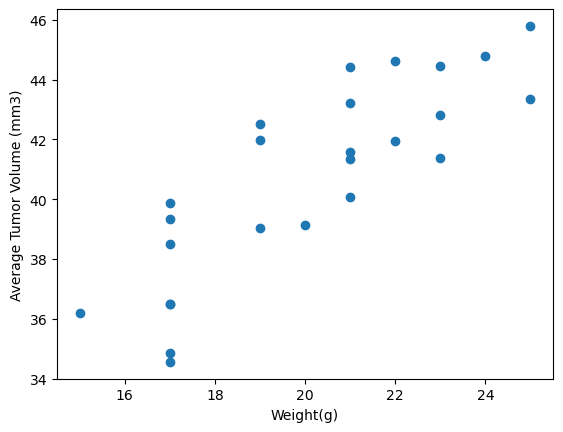

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
wt_vs_avg =clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
avg_data = wt_vs_avg.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
avg_data
plt.scatter(avg_data["Weight (g)"],avg_data["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


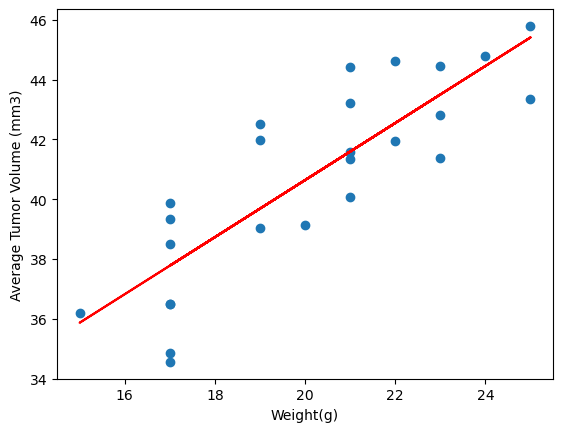

In [22]:
# Calculate the correlation coefficient and a linear regression model 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Add the linear regression equation and line to plot
x_values = avg_data["Weight (g)"]
y_values = avg_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

